In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploded = files.upload()

Saving ionosphere_data.csv to ionosphere_data.csv


In [ ]:
data = pd.read_csv('ionosphere_data.csv', delimiter=",")

In [ ]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
print(data.isnull().sum())

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64


In [ ]:
# split into input (X) and output (Y) variables

X = data.values[1:,0:34].astype(float)
Y = data.values[1:,34]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
epochs=50
learning_rate=0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=8, verbose=2)

Epoch 1/100
30/30 - 0s - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.0605 - val_accuracy: 0.9828
Epoch 2/100
30/30 - 0s - loss: 0.0145 - accuracy: 0.9957 - val_loss: 0.0610 - val_accuracy: 0.9828
Epoch 3/100
30/30 - 0s - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0647 - val_accuracy: 0.9828
Epoch 4/100
30/30 - 0s - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0638 - val_accuracy: 0.9828
Epoch 5/100
30/30 - 0s - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.0663 - val_accuracy: 0.9828
Epoch 6/100
30/30 - 0s - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0703 - val_accuracy: 0.9828
Epoch 7/100
30/30 - 0s - loss: 0.0151 - accuracy: 0.9957 - val_loss: 0.0728 - val_accuracy: 0.9828
Epoch 8/100
30/30 - 0s - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.0650 - val_accuracy: 0.9828
Epoch 9/100
30/30 - 0s - loss: 0.0144 - accuracy: 0.9957 - val_loss: 0.0737 - val_accuracy: 0.9828
Epoch 10/100
30/30 - 0s - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.0617 - val_accuracy: 0.9828
Epoch 11/

In [ ]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

11/11 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9914
accuracy: 99.14%


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt


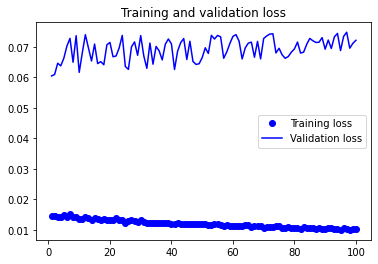

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()